# Exercício de Programação: Classificação com SVM Linear e Não-Linear

Neste exercício, você aplicará os conceitos de Máquinas de Vetores de Suporte (SVM) para classificação linear e não-linear. O objetivo é visualizar o impacto de diferentes hiperparâmetros (`C`, `kernel`, `degree`, `coef0`, `gamma`) nos limites de decisão do modelo.

Usaremos uma versão modificada do dataset de habitação da Califórnia para criar um problema de classificação binária.

**Objetivos:**
1. Treinar e visualizar classificadores `LinearSVC` com diferentes valores de regularização `C`.
2. Treinar e visualizar classificadores `SVC` com kernel polinomial, explorando o hiperparâmetro `coef0`.
3. Treinar e visualizar classificadores `SVC` com kernel RBF, explorando os hiperparâmetros `gamma` e `C`.

## 1. Preparação do Ambiente e dos Dados

Primeiro, importamos as bibliotecas necessárias. Em seguida, carregamos o dataset de habitação da Califórnia, mas o adaptamos para uma tarefa de classificação:
- Usaremos apenas duas features: Renda Média (`MedInc`) e Idade Média da Casa (`HouseAge`).
- Criaremos um target binário: `y = 1` se o Valor Médio da Casa (`MedHouseVal`) for maior ou igual a 1.5 (US$150.000), e `y = 0` caso contrário.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


# Carregar o dataset
housing = fetch_california_housing()
X = housing.data[:, [0, 5]]  # MedInc e HouseAge
y = (housing.target >= 1.5).astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Para tornar a visualização mais clara, vamos usar apenas uma amostra dos dados
np.random.seed(42)
sample_idx = np.random.permutation(len(X_train))[:100]
X_train = X_train[sample_idx]
y_train = y_train[sample_idx]

print(f"Formato de X: {X_train.shape}")
print(f"Formato de y: {y_train.shape}")

Formato de X: (100, 2)
Formato de y: (100,)


## 2. Escalando as Features

SVMs são sensíveis à escala das features. Portanto, é crucial escalá-las usando `StandardScaler`.

In [2]:
scaler = StandardScaler()

# SEU CÓDIGO AQUI: Use o scaler para ajustar e transformar o conjunto de dados X.
X_train_scaled = ...
X_test_scaled = ...
# ----------------

print("Features escaladas!")

Features escaladas!


## 3. Classificação com SVM Linear (`LinearSVC`)

Vamos treinar dois classificadores `LinearSVC`, um com `C=1` (mais regularização, margem mais larga) e outro com `C=100` (menos regularização, margem mais estreita). Lembre-se que `LinearSVC` maximiza a margem entre as classes.

In [3]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np

# Suponha que X e y já estejam definidos com os dados
# Exemplo fictício para contexto:
# X = ... (matriz de atributos)
# y = ... (rótulos binários: 0 ou 1)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hiperparâmetros
C1, C2 = 1, 100

# Treinar os dois modelos LinearSVC com os dados escalados
lin_svc_c1 = LinearSVC(C=C1)
lin_svc_c100 = LinearSVC(C=C2)

lin_svc_c1.fit(X_train_scaled, y_train)
lin_svc_c100.fit(X_train_scaled, y_train)

print("Modelos Lineares treinados!")

# Prever no conjunto de teste
y_pred_c1 = lin_svc_c1.predict(X_test_scaled)
y_pred_c100 = lin_svc_c100.predict(X_test_scaled)

# Calcular F1 Score
f1_c1 = f1_score(y_test, y_pred_c1)
f1_c100 = f1_score(y_test, y_pred_c100)

print(f"F1 Score (C={C1}): {f1_c1}")
print(f"F1 Score (C={C2}): {f1_c100}")


Modelos Lineares treinados!
F1 Score (C=1): 0.8082940622054665
F1 Score (C=100): 0.8082940622054665


### Plotando os Limites de Decisão do SVM Linear

A função `plot_svc_decision_boundary` abaixo nos ajuda a visualizar a rua (margem) criada pelos modelos. Sua tarefa é chamar essa função para plotar os resultados dos dois modelos que você treinou.

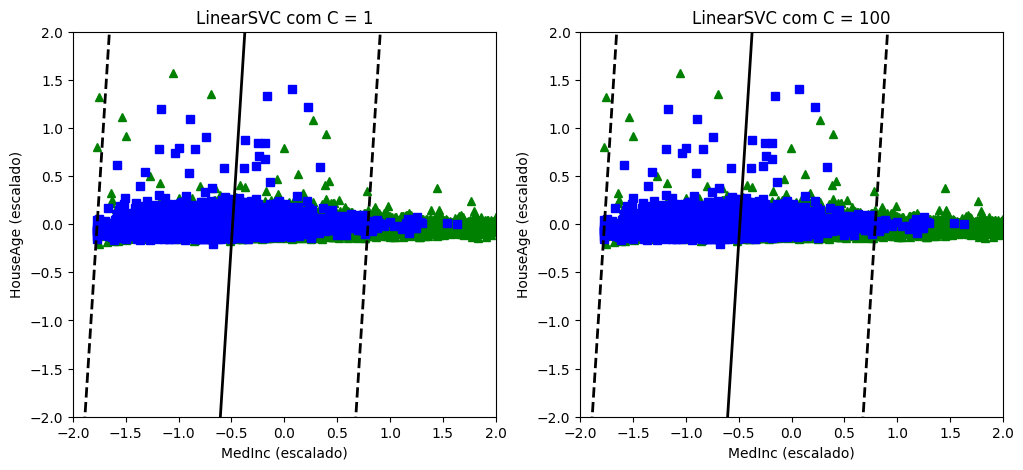

In [4]:
# Função auxiliar para plotar o limite de decisão e as margens
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Configuração da figura
plt.figure(figsize=(12, 5))

# Plot para C=1
plt.subplot(121)
plt.plot(X_train_scaled[:, 0][y_train==1], X_train_scaled[:, 1][y_train==1], "g^", label="y=1")
plt.plot(X_train_scaled[:, 0][y_train==0], X_train_scaled[:, 1][y_train==0], "bs", label="y=0")
plt.xlabel("MedInc (escalado)")
plt.ylabel("HouseAge (escalado)")
plt.title(f"LinearSVC com C = {C1}")
plt.axis([-2, 2, -2, 2])
plot_svc_decision_boundary(lin_svc_c1, -2, 2)

# Plot para C=100
plt.subplot(122)
plt.plot(X_train_scaled[:, 0][y_train==1], X_train_scaled[:, 1][y_train==1], "g^")
plt.plot(X_train_scaled[:, 0][y_train==0], X_train_scaled[:, 1][y_train==0], "bs")
plt.xlabel("MedInc (escalado)")
plt.ylabel("HouseAge (escalado)")
plt.title(f"LinearSVC com C = {C2}")
plt.axis([-2, 2, -2, 2])
plot_svc_decision_boundary(lin_svc_c100, -2, 2)

plt.show()


## 4. Classificação com SVM Não-Linear (Kernel Polinomial)

Para dados que não são linearmente separáveis, podemos usar o truque do kernel. Vamos treinar um `SVC` com um kernel polinomial de grau 3. O hiperparâmetro `coef0` controla o quanto o modelo é influenciado por polinômios de alto grau versus baixo grau. Vamos comparar `coef0=1` e `coef0=100`.

In [5]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Modelos com kernel polinomial
poly_svc_c1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_svc_c100 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=10, C=5))
])

# Treino
poly_svc_c1.fit(X_train, y_train)
poly_svc_c100.fit(X_train, y_train)

print("Modelos com kernel polinomial treinados!")

svm_clfs = [poly_svc_c1, poly_svc_c100]
hyperparams = [(1, 5), (100, 5)]
for (C, coef0), clf in zip(hyperparams, svm_clfs):
    print(f"F1 Score (C={C}, coef0={coef0}): {f1_score(y_test, clf.predict(X_test))}")


Modelos com kernel polinomial treinados!
F1 Score (C=1, coef0=5): 0.8184794470716624
F1 Score (C=100, coef0=5): 0.8184133915574964


### Plotando os Limites de Decisão do SVM Polinomial

Como os limites não são mais lineares, precisamos de uma nova função para plotar as regiões de decisão.

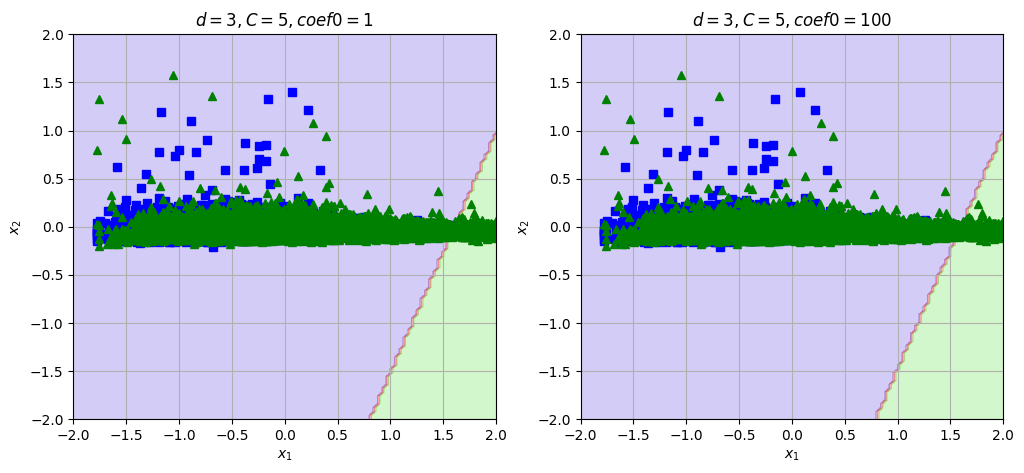

In [6]:
# Função auxiliar para plotar os limites de modelos não-lineares
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")

# Configuração da figura
plt.figure(figsize=(12, 5))

# Plot para coef0=1
plt.subplot(121)
plot_dataset(X_train_scaled, y_train, [-2, 2, -2, 2])
plt.title(r"$d=3, C=5, coef0=1$")

# SEU CÓDIGO AQUI: Chame a função para plotar o limite de decisão do primeiro modelo polinomial.

plot_predictions(poly_svc_c1, [-2, 2, -2, 2])
# Plot para coef0=100
plt.subplot(122)
plot_dataset(X_train_scaled, y_train, [-2, 2, -2, 2])
plt.title(r"$d=3, C=5, coef0=100$")

# SEU CÓDIGO AQUI: Chame a função para plotar o limite de decisão do segundo modelo polinomial.

plot_predictions(poly_svc_c100, [-2, 2, -2, 2])
plt.show()

## 5. Classificação com SVM Não-Linear (Kernel RBF)

O kernel RBF (Função de Base Radial) é muito poderoso. Seus principais hiperparâmetros são `gamma` e `C`.
- `gamma` atua como um hiperparâmetro de regularização: aumentá-lo torna o limite de decisão mais irregular (aumenta a variância, diminui o viés), enquanto diminuí-lo o torna mais suave.
- `C` funciona como nos modelos lineares: um `C` grande leva a menos regularização, enquanto um `C` pequeno leva a mais regularização.

Vamos treinar e visualizar quatro modelos com diferentes combinações desses hiperparâmetros.

Modelos RBF treinados!
F1 Score (gamma=0.1, C=0.001): 0.7779751332149201
F1 Score (gamma=0.1, C=1000): 0.8162062615101289
F1 Score (gamma=5, C=0.001): 0.8202468252548739
F1 Score (gamma=5, C=1000): 0.8173652694610778


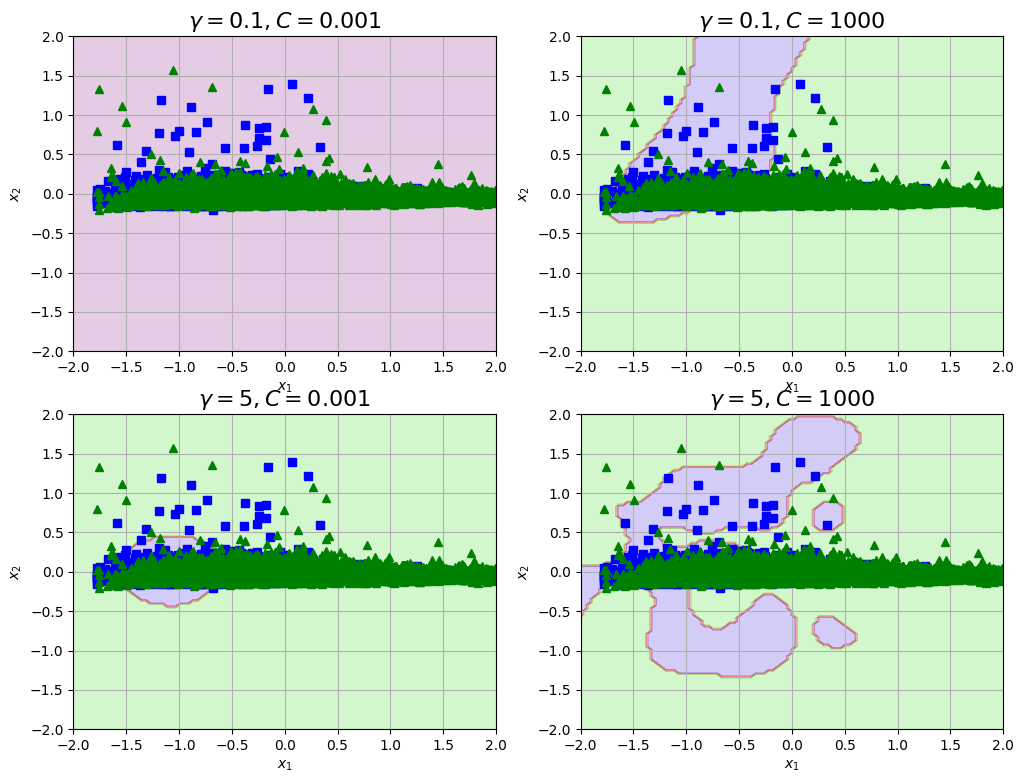

In [7]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    # Modelo
    rbf_kernel_svm_clf = SVC(kernel='rbf', gamma=gamma, C=C)
    
    # Treino
    rbf_kernel_svm_clf.fit(X_train_scaled, y_train)
    
    svm_clfs.append(rbf_kernel_svm_clf)

print("Modelos RBF treinados!")

plt.figure(figsize=(12, 9))

for i, svm_clf in enumerate(svm_clfs):
    y_pred = svm_clf.predict(X_test_scaled)
    print(f"F1 Score (gamma={hyperparams[i][0]}, C={hyperparams[i][1]}): {f1_score(y_test, y_pred)}")

    plt.subplot(221 + i)
    plot_dataset(X_train_scaled, y_train, [-2, 2, -2, 2])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

    # Chame a função para plotar o limite de decisão para o modelo atual
    plot_predictions(svm_clf, [-2, 2, -2, 2])

plt.show()
